In [2]:
import numpy as np
import pandas as pd

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
RSEED=42
import datetime, time, os

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
df = pd.read_csv('data/train.csv')
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [6]:
df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [7]:
print(df.id.unique())
print(df.breath_id.unique())
print(df.R.unique())
print(df.C.unique())
#print(df.time_step.unique())
#print(df.u_in.unique())
#print(df.u_out.unique())
print(df.pressure.nunique())

[      1       2       3 ... 6035998 6035999 6036000]
[     1      2      3 ... 125743 125745 125749]
[20 50  5]
[50 20 10]
950


In [8]:
df.groupby('breath_id').count()

,id,R,C,time_step,u_in,u_out,pressure
breath_id,,,,,,,
1,80,80,80,80,80,80,80
2,80,80,80,80,80,80,80
3,80,80,80,80,80,80,80
4,80,80,80,80,80,80,80
5,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...
125740,80,80,80,80,80,80,80
125742,80,80,80,80,80,80,80
125743,80,80,80,80,80,80,80


In [9]:
press = df.pressure.sort_values()#nunique()
press#tail(80)

28729      -1.895744
2698557    -1.895744
5349582    -1.895744
5349561    -1.825442
5781548    -1.825442
             ...    
967373     64.820992
967374     64.820992
967375     64.820992
5731615    64.820992
1383369    64.820992
Name: pressure, Length: 6036000, dtype: float64

/Users/haritha_retnakaran/Documents/Neufische/CapStone/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


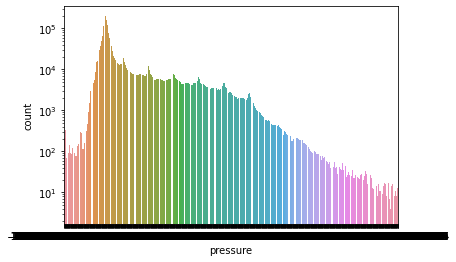

In [10]:
sns.countplot(df['pressure'])
#rcParams['figure.figsize'] = 10,10
plt.yscale('log')

In [11]:
np.max(df.query('u_out==0'))#.count()

/Users/haritha_retnakaran/Documents/Neufische/CapStone/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


id           6.035950e+06
breath_id    1.257490e+05
R            5.000000e+01
C            5.000000e+01
time_step    9.997981e-01
u_in         1.000000e+02
u_out        0.000000e+00
pressure     6.482099e+01
dtype: float64

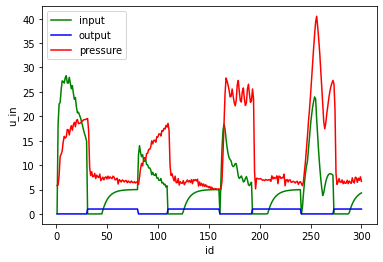

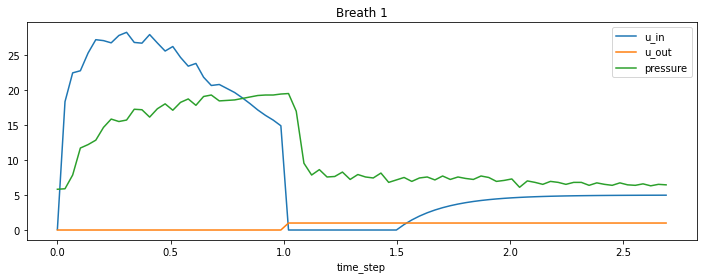

In [12]:
df1 = df.iloc[0:300,]
sns.lineplot(data=df1, x='id', y='u_in', color='green', label='input')
sns.lineplot(data=df1, x='id', y='u_out', color='blue', label='output')
sns.lineplot(data=df1, x='id', y='pressure', color='red', label='pressure')
plt.legend()
plt.show()

f, ax = plt.subplots(figsize=(12, 4))
df[df['breath_id'] == 1].set_index('time_step')[['u_in', 'u_out', 'pressure']].plot(ax=ax)
plt.title('Breath 1')
plt.show()

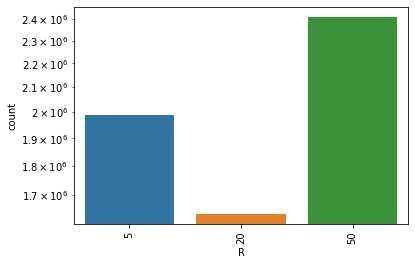

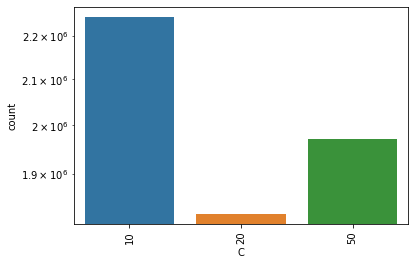

In [13]:
# bivartiate distrobution
for c in df[['R','C']].columns:
        plt.figure()
        #rcParams['figure.figsize'] = 5,5
        #g = sns.FacetGrid(data = data,  col = 'FraudResult')
        sns.countplot(x=c, data = df)
        #g.map(sns.countplot, x = c)
        plt.xticks(rotation=90)
        plt.yscale('log')

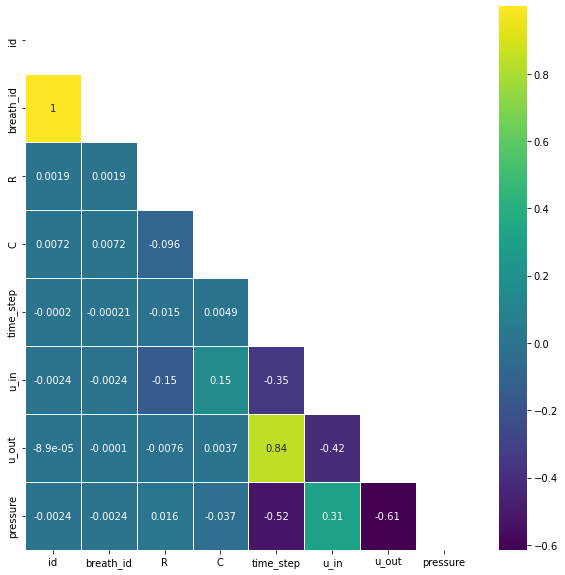

In [14]:
# plotting the correlation matrix on the given data to see how each column correlates to another
#stud_data = df#.drop(['sex', 'lang', 'country'], axis = 1)
plt.figure(figsize=(10, 10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

In [15]:
#sns.pairplot(df[['u_in', 'u_out', 'pressure', 'R', 'C']])

In [16]:
# Convert time_step to datetime object
# Extract additional features from timestamp column
df1 = df.assign(
    timestamp = lambda x: pd.to_datetime(x['time_step']), 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)

df1.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,timestamp,date,year,month,day,dayofyear,hour
0,1,1,20,50,0.000000,0.083334,0,5.837492,1970-01-01,1970-01-01,1970,1,1,1,0
1,2,1,20,50,0.033652,18.383041,0,5.907794,1970-01-01,1970-01-01,1970,1,1,1,0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1970-01-01,1970-01-01,1970,1,1,1,0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1970-01-01,1970-01-01,1970,1,1,1,0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1970-01-01,1970-01-01,1970,1,1,1,0


### Feature engineering

In [17]:
df['vol'] = df['time_step'] * df['u_in']
df['vol'] = df.query('u_out==0').groupby('breath_id')['vol'].cumsum()

In [18]:
df['rtime']=df['time_step'].apply(lambda x: round(x,3))

In [19]:
df.query('id%80==2')

,id,breath_id,R,C,time_step,u_in,u_out,pressure,vol,rtime
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.618632,0.034
81,82,2,20,20,0.033998,13.980205,0,7.524743,0.475293,0.034
161,162,3,50,20,0.031964,7.187242,0,5.064168,0.229732,0.032
241,242,4,50,50,0.031854,1.262539,0,5.767190,0.040216,0.032
321,322,5,5,50,0.033967,28.504653,0,7.384139,0.968218,0.034
...,...,...,...,...,...,...,...,...,...,...
6035601,6035602,125740,50,50,0.034880,0.000000,0,5.837492,0.000000,0.035
6035681,6035682,125742,20,10,0.033818,100.000000,0,11.391361,3.381801,0.034
6035761,6035762,125743,20,10,0.033683,0.000000,0,5.907794,0.000000,0.034
6035841,6035842,125745,50,50,0.031680,23.588836,0,8.790182,0.747286,0.032


In [20]:
df['step_id']=df.id.apply(lambda x: x%80)

In [21]:
df=df.query('u_out==0')
df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
df['minus_one']=-1.0
df['plus_one']=1.0
df['exponent']=(df['minus_one']*df['time_step'])/(df['R']*df['C'])
df['factor']=np.exp(df['exponent'])
df['vf']=(df['u_in_cumsum']*df['R'])/df['factor']
df['vt']=0
df.loc[df['time_step'] != 0, 'vt']=df['vol']/(df['C']*(df['minus_one']*df['factor']+df['plus_one']))
df['v']=df['vf']+df['vt']

/var/folders/d5/ywbj67kx54n4fq9j7nf3v4wh0000gn/T/ipykernel_36357/969937783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
/var/folders/d5/ywbj67kx54n4fq9j7nf3v4wh0000gn/T/ipykernel_36357/969937783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minus_one']=-1.0
/var/folders/d5/ywbj67kx54n4fq9j7nf3v4wh0000gn/T/ipykernel_36357/969937783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [22]:
cols=['v','u_in_cumsum','vol','pressure', 'u_in', 'R', 'C', 'time_step', 'step_id']
red_df=df[cols]
red_df

,v,u_in_cumsum,vol,pressure,u_in,R,C,time_step,step_id
0,1.666680,0.083334,0.000000,5.837492,0.083334,20,50,0.000000,1
1,737.006954,18.466375,0.618632,5.907794,18.383041,20,50,0.033652,2
2,1453.034477,40.975653,2.138333,7.876254,22.509278,20,50,0.067514,3
3,2153.211108,63.784476,4.454391,11.742872,22.808822,20,50,0.101542,4
4,2946.481672,89.140326,7.896588,12.234987,25.355850,20,50,0.135756,5
...,...,...,...,...,...,...,...,...,...
6035945,15962.475671,238.890288,66.643100,29.459013,1.869367,50,10,0.834147,26
6035946,16025.086384,241.044703,68.512214,29.107502,2.154414,50,10,0.867574,27
6035947,16010.376008,242.349137,69.687402,29.880825,1.304434,50,10,0.900917,28
6035948,16046.588564,244.082966,71.307334,29.388710,1.733830,50,10,0.934309,29


In [23]:
#train test split
target="pressure"
X = red_df.drop(target, axis=1)
y = red_df.loc[:,target].values
#y = df_dmy[target]
#y = np.array(df.pop("target"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=RSEED)#, stratify=False)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


scaler= StandardScaler()
#num_list = list(X_train.columns[X_train.dtypes!=object])
col_names = ['v', 'u_in_cumsum', 'vol', 'u_in',	'R', 'C']
X_train_num=X_train[col_names].copy()

X_train[col_names] = scaler.fit_transform(X_train[col_names])
X_test[col_names] = scaler.transform(X_test[col_names])

X_train shape: (1603677, 8)
y_train shape: (1603677,)
X_test shape: (687291, 8)
y_test shape: (687291,)


In [24]:
X_train

,v,u_in_cumsum,vol,u_in,R,C,time_step,step_id
1401948,0.947879,0.834478,1.705904,-0.078962,-0.367726,1.402101,0.961879,29
5092973,-0.781647,-0.775853,-0.592568,-0.634423,-0.367726,1.402101,0.441438,14
1662175,1.322907,1.389727,0.566895,0.801243,-0.367726,-0.351028,0.510178,16
5361281,-0.830721,-0.788475,-0.633220,-0.058180,-1.131439,-0.935405,0.033410,2
750802,-0.205468,-0.609426,-0.611823,0.613313,1.159699,-0.351028,0.063846,3
...,...,...,...,...,...,...,...,...
1929452,-0.520108,0.379309,0.065216,0.398164,-1.131439,-0.935405,0.405312,13
290655,1.063479,-0.064985,-0.217599,0.594376,1.159699,1.402101,0.476369,16
4460322,-0.829744,-0.779733,-0.629879,-0.287644,-1.131439,-0.935405,0.067305,3
5872821,1.482992,0.226267,-0.156462,-0.745721,1.159699,-0.935405,0.663828,22


### Neural Network

In [25]:
def error_analysis(y_test, y_pred_test):
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([y_test.min(), y_test.max()], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [26]:
# With this command you can clear any logs from previous runs
# If you want to compare different runs you can skip this cell 
!rm -rf my_logs/

In [27]:
# Define path for new directory 
root_logdir = os.path.join(os.curdir, "my_logs")
root_logdir

'./my_logs'

In [28]:
# Define function for creating a new folder for each run
def get_run_logdir():
    run_id = time.strftime('run_%d_%m_%Y-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [29]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_21_04_2022-10_05_27'

In [30]:
# Create function for using callbacks; "name" should be the name of the model you use
def get_callbacks(name):
    return tf.keras.callbacks.TensorBoard(run_logdir+name, histogram_freq=1)

In [31]:
#Build a model
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [32]:
#choosing the variable and normalizing it
col_var = ['v', 'u_in_cumsum', 'vol', 'u_in', 'R', 'C']
all_var = np.array(X_train[col_var])

u_all_normalizer = preprocessing.Normalization(input_shape = [6,], axis = None)
u_all_normalizer.adapt(all_var)

2022-04-21 10:05:29.864572: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-21 10:05:29.865972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-21 10:05:30.194914: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-21 10:05:30.893902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 10:05:30.941482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### model1

In [33]:
# Initalizing and training the model 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
# Making predictions 
y_pred = lin_reg.predict(X_test)

In [35]:
# Evaluting model
mae =  mean_absolute_error(y_test, y_pred).round(2)
mse = mean_squared_error(y_test, y_pred).round(2)

print('MAE:', mae)
print('MSE', mse)

MAE: 4.2
MSE 31.45


In [36]:
#We'll store the result in a dictionary in order to compare the results of different models in the end.
test_results = {}
test_results['sklearn_model'] =  [mae, mse]
test_results

{'sklearn_model': [4.2, 31.45]}

### Model2

In [37]:
#building the model using single input
dnn_all_model = build_and_compile_model(u_all_normalizer)

In [38]:
#model summary
dnn_all_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,676
Trainable params: 4,673
Non-trainable params: 3
_________________________________________________________________


In [39]:
#Train the model
#%%time
history = dnn_all_model.fit(
    X_train[col_var], y_train,
    validation_split=0.2,
    verbose=1, epochs=10,
    batch_size = 4000,
    callbacks=get_callbacks("dnn_6_var"))

Epoch 1/10


2022-04-21 10:07:02.458270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


320/321 [============================>.] - ETA: 0s - loss: 6.7297 - mae: 6.7297

2022-04-21 10:07:07.507547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


321/321 [==============================] - 6s 16ms/step - loss: 6.7225 - mae: 6.7225 - val_loss: 3.5360 - val_mae: 3.5360
Epoch 2/10
321/321 [==============================] - 3s 10ms/step - loss: 2.8989 - mae: 2.8989 - val_loss: 2.5780 - val_mae: 2.5780
Epoch 3/10
321/321 [==============================] - 3s 8ms/step - loss: 2.4170 - mae: 2.4170 - val_loss: 2.2809 - val_mae: 2.2809
Epoch 4/10
321/321 [==============================] - 3s 9ms/step - loss: 2.2031 - mae: 2.2031 - val_loss: 2.1300 - val_mae: 2.1300
Epoch 5/10
321/321 [==============================] - 3s 8ms/step - loss: 2.0968 - mae: 2.0968 - val_loss: 2.0571 - val_mae: 2.0571
Epoch 6/10
321/321 [==============================] - 3s 9ms/step - loss: 2.0404 - mae: 2.0404 - val_loss: 2.0115 - val_mae: 2.0115
Epoch 7/10
321/321 [==============================] - 2s 7ms/step - loss: 1.9972 - mae: 1.9972 - val_loss: 1.9706 - val_mae: 1.9706
Epoch 8/10
321/321 [==============================] - 2s 8ms/step - loss: 1.9600 - ma

In [40]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

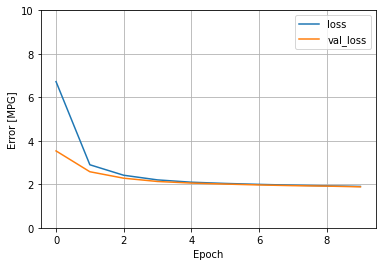

In [41]:
plot_loss(history)

In [42]:
#def plot_u_in(x, y):
#    plt.scatter(X_train[col_var], y_train, label='Data')
#    plt.plot(X_test['u_in'], y_test, color='k', label='Predictions')
#    plt.xlabel('All var')
#    plt.ylabel('Pressure')
#    plt.legend()

In [43]:
#plot_u_in(X_test['u_in'].to_numpy(), y_test)
#plt.rcParams['figure.figsize'] = [12, 6]
#plt.rcParams['figure.dpi'] = 100
#plt.rcParams['agg.path.chunksize'] = 120
#plt.scatter(X_test['u_in'].to_numpy(), y_test)

In [44]:
test_results['dnn_6_var'] = dnn_all_model.evaluate(X_test[col_var], y_test, verbose=0)

In [45]:
pd.DataFrame(test_results, index=['Mean absolute error [Pressure]', 'Mean squared error [Pressure]']).T

,Mean absolute error [Pressure],Mean squared error [Pressure]
sklearn_model,4.200000,31.450000
dnn_6_var,1.891729,1.891729


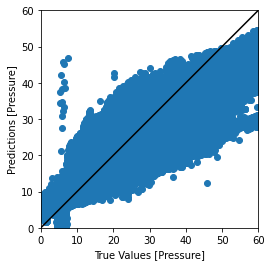

In [49]:
y_pred_dnn_all = dnn_all_model.predict(X_test[col_var]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_dnn_all)
plt.xlabel('True Values [Pressure]')
plt.ylabel('Predictions [Pressure]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='k')

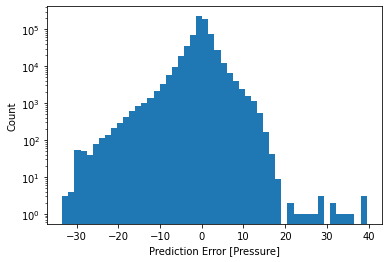

In [50]:
error = y_pred_dnn_all - y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [Pressure]')
_ = plt.ylabel('Count')
plt.yscale('log')

### Model3

All variables to neural network

In [51]:
X_train.columns

Index(['v', 'u_in_cumsum', 'vol', 'u_in', 'R', 'C', 'time_step', 'step_id'], dtype='object')

In [52]:
#choosing the variable and normalizing it
#col_var = ['v', 'u_in_cumsum', 'vol', 'u_in', 'R', 'C']
new_var = np.array(X_train)

new_all_normalizer = preprocessing.Normalization(input_shape = [8,], axis = None)
new_all_normalizer.adapt(new_var)

2022-04-21 10:16:20.304449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-21 10:16:20.330322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [54]:
#Build a model
def build_and_compile_model2(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [55]:
#building the model using single input
dnn_new_all_model = build_and_compile_model2(new_all_normalizer)

In [56]:
#model summary
dnn_new_all_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,964
Trainable params: 8,961
Non-trainable params: 3
____________________________________________________

In [57]:
#Train the model
#%%time
history = dnn_new_all_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=100,
    batch_size = 2000,
    callbacks=get_callbacks("dnn_all_var"))

Epoch 1/100


2022-04-21 10:18:03.463291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


642/642 [==============================] - ETA: 0s - loss: 4.5476 - mae: 4.5476

2022-04-21 10:18:10.982276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


642/642 [==============================] - 9s 13ms/step - loss: 4.5476 - mae: 4.5476 - val_loss: 2.6286 - val_mae: 2.6286
Epoch 2/100
642/642 [==============================] - 6s 10ms/step - loss: 2.4421 - mae: 2.4421 - val_loss: 2.2910 - val_mae: 2.2910
Epoch 3/100
642/642 [==============================] - 5s 8ms/step - loss: 2.1852 - mae: 2.1852 - val_loss: 2.1080 - val_mae: 2.1080
Epoch 4/100
642/642 [==============================] - 5s 7ms/step - loss: 2.0300 - mae: 2.0300 - val_loss: 2.0093 - val_mae: 2.0093
Epoch 5/100
642/642 [==============================] - 5s 7ms/step - loss: 1.9415 - mae: 1.9415 - val_loss: 1.8945 - val_mae: 1.8945
Epoch 6/100
642/642 [==============================] - 7s 10ms/step - loss: 1.8899 - mae: 1.8899 - val_loss: 1.8622 - val_mae: 1.8622
Epoch 7/100
642/642 [==============================] - 5s 8ms/step - loss: 1.8571 - mae: 1.8571 - val_loss: 1.8251 - val_mae: 1.8251
Epoch 8/100
642/642 [==============================] - 6s 9ms/step - loss: 1.8

In [58]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Pressure]')
    plt.legend()
    plt.grid(True)

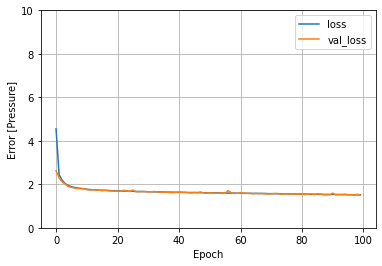

In [59]:
plot_loss(history)

In [60]:
test_results['dnn_all_var'] = dnn_new_all_model.evaluate(X_test, y_test, verbose=0)

In [61]:
pd.DataFrame(test_results, index=['Mean absolute error [Pressure]', 'Mean squared error [Pressure]']).T

,Mean absolute error [Pressure],Mean squared error [Pressure]
sklearn_model,4.200000,31.450000
dnn_6_var,1.891729,1.891729
dnn_all_var,1.511555,1.511555


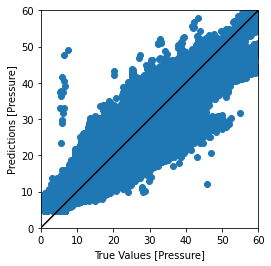

In [63]:
y_pred_new_dnn_all = dnn_new_all_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_new_dnn_all)
plt.xlabel('True Values [Pressure]')
plt.ylabel('Predictions [Pressure]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='k')

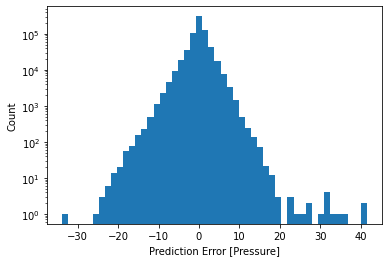

In [64]:
error = y_pred_new_dnn_all - y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [Pressure]')
_ = plt.ylabel('Count')
plt.yscale('log')

### Model4

layer size=30, epoch=100, no. of layers=3, batch size=2000

In [65]:
#Build a model
def build_and_compile_model3(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(30, activation='relu'),
        layers.Dense(30, activation='relu'),
        layers.Dense(30, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

#building the model using single input
dnn_new_all_model3 = build_and_compile_model3(new_all_normalizer)
#model summary
dnn_new_all_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 30)                270       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 30)                930       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,164
Trainable params: 2,161
Non-trainable params: 3
____________________________________________________

In [66]:
#Train the model
#%%time
history = dnn_new_all_model3.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=100,
    batch_size = 2000,
    callbacks=get_callbacks("dnn_all_var_small_layer"))

Epoch 1/100


2022-04-21 10:30:34.888752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


642/642 [==============================] - ETA: 0s - loss: 5.8734 - mae: 5.8734

2022-04-21 10:30:43.569474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


642/642 [==============================] - 10s 14ms/step - loss: 5.8734 - mae: 5.8734 - val_loss: 3.0328 - val_mae: 3.0328
Epoch 2/100
642/642 [==============================] - 6s 10ms/step - loss: 2.7431 - mae: 2.7431 - val_loss: 2.6058 - val_mae: 2.6058
Epoch 3/100
642/642 [==============================] - 5s 7ms/step - loss: 2.5406 - mae: 2.5406 - val_loss: 2.4674 - val_mae: 2.4674
Epoch 4/100
642/642 [==============================] - 5s 8ms/step - loss: 2.4140 - mae: 2.4140 - val_loss: 2.3561 - val_mae: 2.3561
Epoch 5/100
642/642 [==============================] - 6s 9ms/step - loss: 2.3063 - mae: 2.3063 - val_loss: 2.2607 - val_mae: 2.2607
Epoch 6/100
642/642 [==============================] - 6s 9ms/step - loss: 2.2192 - mae: 2.2192 - val_loss: 2.1829 - val_mae: 2.1829
Epoch 7/100
642/642 [==============================] - 5s 8ms/step - loss: 2.1560 - mae: 2.1560 - val_loss: 2.1204 - val_mae: 2.1204
Epoch 8/100
642/642 [==============================] - 6s 9ms/step - loss: 2.1

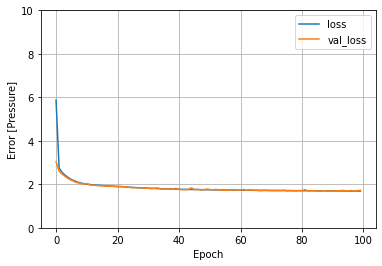

In [67]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Pressure]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [68]:
test_results['dnn_all_var_small_layer'] = dnn_new_all_model3.evaluate(X_test, y_test, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Pressure]', 'Mean squared error [Pressure]']).T

,Mean absolute error [Pressure],Mean squared error [Pressure]
sklearn_model,4.200000,31.450000
dnn_6_var,1.891729,1.891729
dnn_all_var,1.511555,1.511555
dnn_all_var_small_layer,1.729749,1.729749


2022-04-21 10:40:18.613684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


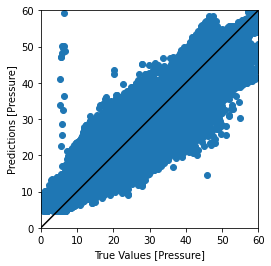

In [69]:
y_pred_new_dnn_all_model3 = dnn_new_all_model3.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_new_dnn_all_model3)
plt.xlabel('True Values [Pressure]')
plt.ylabel('Predictions [Pressure]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='k')

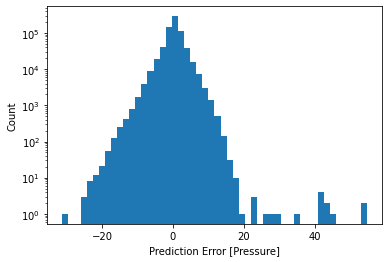

In [70]:
error_model3 = y_pred_new_dnn_all_model3 - y_test
plt.hist(error_model3, bins=50)
plt.xlabel('Prediction Error [Pressure]')
_ = plt.ylabel('Count')
plt.yscale('log')

### model5

layer size=80, epoch=200, batch size=1000

In [71]:
#Build a model
def build_and_compile_model4(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

#building the model using single input
dnn_new_all_model4 = build_and_compile_model4(new_all_normalizer)
#model summary
dnn_new_all_model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                3         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 80)                720       
                                                                 
 dense_12 (Dense)            (None, 80)                6480      
                                                                 
 dense_13 (Dense)            (None, 80)                6480      
                                                                 
 dense_14 (Dense)            (None, 1)                 81        
                                                                 
Total params: 13,764
Trainable params: 13,761
Non-trainable params: 3
__________________________________________________

In [72]:
#Train the model
#%%time
history = dnn_new_all_model4.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=200,
    batch_size = 1000,
    callbacks=get_callbacks("dnn_all_var_large_layer"))

Epoch 1/200


2022-04-21 11:08:50.786802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1283/1283 [==============================] - ETA: 0s - loss: 3.3577 - mae: 3.3577

2022-04-21 11:09:03.961236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1283/1283 [==============================] - 16s 10ms/step - loss: 3.3577 - mae: 3.3577 - val_loss: 2.1187 - val_mae: 2.1187
Epoch 2/200
1283/1283 [==============================] - 11s 8ms/step - loss: 2.0013 - mae: 2.0013 - val_loss: 1.9115 - val_mae: 1.9115
Epoch 3/200
1283/1283 [==============================] - 11s 8ms/step - loss: 1.8900 - mae: 1.8900 - val_loss: 1.8527 - val_mae: 1.8527
Epoch 4/200
1283/1283 [==============================] - 10s 8ms/step - loss: 1.8370 - mae: 1.8370 - val_loss: 1.8117 - val_mae: 1.8117
Epoch 5/200
1283/1283 [==============================] - 10s 8ms/step - loss: 1.8046 - mae: 1.8046 - val_loss: 1.9065 - val_mae: 1.9065
Epoch 6/200
1283/1283 [==============================] - 11s 8ms/step - loss: 1.7762 - mae: 1.7762 - val_loss: 1.8136 - val_mae: 1.8136
Epoch 7/200
1283/1283 [==============================] - 10s 8ms/step - loss: 1.7512 - mae: 1.7512 - val_loss: 1.7222 - val_mae: 1.7222
Epoch 8/200
1283/1283 [==============================] - 11

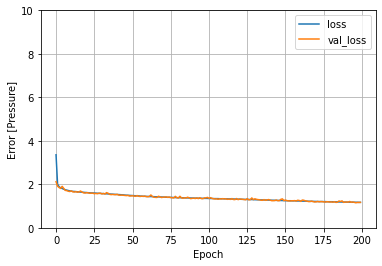

In [73]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Pressure]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [74]:
test_results['dnn_all_var_large_layer'] = dnn_new_all_model4.evaluate(X_test, y_test, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Pressure]', 'Mean squared error [Pressure]']).T

,Mean absolute error [Pressure],Mean squared error [Pressure]
sklearn_model,4.200000,31.450000
dnn_6_var,1.891729,1.891729
dnn_all_var,1.511555,1.511555
dnn_all_var_small_layer,1.729749,1.729749
dnn_all_var_large_layer,1.175651,1.175651


2022-04-21 11:51:11.150371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


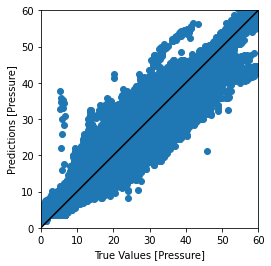

In [75]:

y_pred_new_dnn_all_model4 = dnn_new_all_model4.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_new_dnn_all_model4)
plt.xlabel('True Values [Pressure]')
plt.ylabel('Predictions [Pressure]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='k')

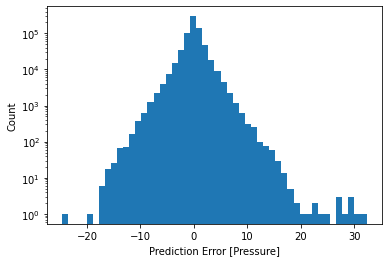

In [76]:

error_model4 = y_pred_new_dnn_all_model4 - y_test
plt.hist(error_model4, bins=50)
plt.xlabel('Prediction Error [Pressure]')
_ = plt.ylabel('Count')
plt.yscale('log')


### model6

layer size = 80, no of layers = 4, batch size=500, epoch =200

In [77]:
#Build a model
def build_and_compile_model5(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

#building the model using single input
dnn_new_all_model5 = build_and_compile_model5(new_all_normalizer)
#model summary
dnn_new_all_model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                3         
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 80)                720       
                                                                 
 dense_16 (Dense)            (None, 80)                6480      
                                                                 
 dense_17 (Dense)            (None, 80)                6480      
                                                                 
 dense_18 (Dense)            (None, 80)                6480      
                                                                 
 dense_19 (Dense)            (None, 1)                 81        
                                                      

In [78]:
#Train the model
#%%time
history = dnn_new_all_model5.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=200,
    batch_size = 500,
    callbacks=get_callbacks("dnn_all_var_large_4layer"))

Epoch 1/200


2022-04-21 11:52:08.065184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2566/2566 [==============================] - ETA: 0s - loss: 2.6212 - mae: 2.6212

2022-04-21 11:52:32.006471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2566/2566 [==============================] - 28s 10ms/step - loss: 2.6212 - mae: 2.6212 - val_loss: 1.9079 - val_mae: 1.9079
Epoch 2/200
2566/2566 [==============================] - 22s 9ms/step - loss: 1.8493 - mae: 1.8493 - val_loss: 1.7980 - val_mae: 1.7980
Epoch 3/200
2566/2566 [==============================] - 20s 8ms/step - loss: 1.7726 - mae: 1.7726 - val_loss: 1.7924 - val_mae: 1.7924
Epoch 4/200
2566/2566 [==============================] - 19s 7ms/step - loss: 1.7191 - mae: 1.7191 - val_loss: 1.7297 - val_mae: 1.7297
Epoch 5/200
2566/2566 [==============================] - 19s 7ms/step - loss: 1.6859 - mae: 1.6859 - val_loss: 1.6374 - val_mae: 1.6374
Epoch 6/200
2566/2566 [==============================] - 21s 8ms/step - loss: 1.6599 - mae: 1.6599 - val_loss: 1.6956 - val_mae: 1.6956
Epoch 7/200
2566/2566 [==============================] - 20s 8ms/step - loss: 1.6311 - mae: 1.6311 - val_loss: 1.5979 - val_mae: 1.5979
Epoch 8/200
2566/2566 [==============================] - 20

In [79]:
test_results['dnn_all_var_large_4layer'] = dnn_new_all_model5.evaluate(X_test, y_test, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Pressure]', 'Mean squared error [Pressure]']).T

,Mean absolute error [Pressure],Mean squared error [Pressure]
sklearn_model,4.200000,31.450000
dnn_6_var,1.891729,1.891729
dnn_all_var,1.511555,1.511555
dnn_all_var_small_layer,1.729749,1.729749
dnn_all_var_large_layer,1.175651,1.175651
dnn_all_var_large_4layer,1.020248,1.020248


sklearn_model = linear regression, all 8 variable <br>
dnn_6_var = NN, 2 hidden layer, size 64, epoch 10, batch size 4000, 6 features(col_var = ['v', 'u_in_cumsum', 'vol', 'u_in', 'R', 'C') <br>
dnn_all_var = NN, 3 hidden layer, size 64, epoch 100, batch size 2000, all 8 features <br>
dnn_all_var_small_layer = NN, 3 hidden layer, size 30, epoch 100, batch size 2000, 8 features <br>
dnn_all_var_large_layer = NN, 3 hidden layer, size 80, epoch 200, batch size 1000, 8 features <br>
dnn_all_var_small_4layer = NN, 4 hidden layer, size 80, epoch 200, batch size 500, 8 features <br>

### Model7

layer size = 80, no of layers = 4, batch size=500, epoch =1000, learning rate=0.001

In [80]:
#Build a model
def build_and_compile_model6(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

#building the model using single input
dnn_new_all_model6 = build_and_compile_model6(new_all_normalizer)
#model summary
dnn_new_all_model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                3         
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 80)                720       
                                                                 
 dense_21 (Dense)            (None, 80)                6480      
                                                                 
 dense_22 (Dense)            (None, 80)                6480      
                                                                 
 dense_23 (Dense)            (None, 80)                6480      
                                                                 
 dense_24 (Dense)            (None, 80)                6480      
                                                      

In [81]:
#Train the model
#%%time
history = dnn_new_all_model6.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=500,
    batch_size = 500,
    callbacks=get_callbacks("dnn_all_var_large_5layer_ep500"))

Epoch 1/500


2022-04-21 13:10:13.676432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2566/2566 [==============================] - ETA: 0s - loss: 2.5807 - mae: 2.5807

2022-04-21 13:10:39.087947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2566/2566 [==============================] - 29s 11ms/step - loss: 2.5807 - mae: 2.5807 - val_loss: 1.8737 - val_mae: 1.8737
Epoch 2/500
2566/2566 [==============================] - 23s 9ms/step - loss: 1.8564 - mae: 1.8564 - val_loss: 1.8451 - val_mae: 1.8451
Epoch 3/500
2566/2566 [==============================] - 24s 9ms/step - loss: 1.7562 - mae: 1.7562 - val_loss: 1.7304 - val_mae: 1.7304
Epoch 4/500
2566/2566 [==============================] - 26s 10ms/step - loss: 1.7072 - mae: 1.7072 - val_loss: 1.6674 - val_mae: 1.6674
Epoch 5/500
2566/2566 [==============================] - 21s 8ms/step - loss: 1.6731 - mae: 1.6731 - val_loss: 1.6669 - val_mae: 1.6669
Epoch 6/500
2566/2566 [==============================] - 23s 9ms/step - loss: 1.6414 - mae: 1.6414 - val_loss: 1.6297 - val_mae: 1.6297
Epoch 7/500
2566/2566 [==============================] - 23s 9ms/step - loss: 1.6209 - mae: 1.6209 - val_loss: 1.5609 - val_mae: 1.5609
Epoch 8/500
2566/2566 [==============================] - 2

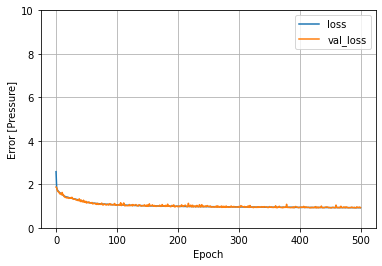

In [83]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Pressure]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [82]:
test_results['dnn_all_var_large_5layer_ep500'] = dnn_new_all_model6.evaluate(X_test, y_test, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Pressure]', 'Mean squared error [Pressure]']).T

,Mean absolute error [Pressure],Mean squared error [Pressure]
sklearn_model,4.200000,31.450000
dnn_6_var,1.891729,1.891729
dnn_all_var,1.511555,1.511555
dnn_all_var_small_layer,1.729749,1.729749
dnn_all_var_large_layer,1.175651,1.175651
dnn_all_var_large_4layer,1.020248,1.020248
dnn_all_var_large_5layer_ep500,0.929257,0.929257


### Model 8

lr = 0.001, softmax, layer size = 100

In [88]:
#Build a model
def build_and_compile_model7(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(100, activation='softmax'),
        layers.Dense(100, activation='softmax'),
        layers.Dense(100, activation='softmax'),
        layers.Dense(100, activation='softmax'),
        layers.Dense(100, activation='softmax'),
        layers.Dense(1)
    ])

    model.compile(loss='mae',
                  metrics='mae',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

#building the model using single input
dnn_new_all_model7 = build_and_compile_model7(new_all_normalizer)
#model summary
dnn_new_all_model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                3         
 ion)                                                            
                                                                 
 dense_38 (Dense)            (None, 100)               900       
                                                                 
 dense_39 (Dense)            (None, 100)               10100     
                                                                 
 dense_40 (Dense)            (None, 100)               10100     
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                      

In [89]:
#Train the model
#%%time
history = dnn_new_all_model7.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=500,
    batch_size = 500,
    callbacks=get_callbacks("dnn_all_var_large_5layer_ep500_softmax"))

Epoch 1/500


2022-04-21 23:14:33.452580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2566/2566 [==============================] - ETA: 0s - loss: 14.1693 - mae: 14.1693

2022-04-21 23:15:30.186167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2566/2566 [==============================] - 70s 23ms/step - loss: 14.1693 - mae: 14.1693 - val_loss: 10.8010 - val_mae: 10.8010
Epoch 2/500
2566/2566 [==============================] - 50s 19ms/step - loss: 9.3780 - mae: 9.3780 - val_loss: 8.3819 - val_mae: 8.3819
Epoch 3/500
2566/2566 [==============================] - 38s 15ms/step - loss: 7.9156 - mae: 7.9156 - val_loss: 7.5902 - val_mae: 7.5902
Epoch 4/500
2566/2566 [==============================] - 35s 14ms/step - loss: 7.5366 - mae: 7.5366 - val_loss: 7.5110 - val_mae: 7.5110
Epoch 5/500
2566/2566 [==============================] - 33s 13ms/step - loss: 7.5206 - mae: 7.5206 - val_loss: 7.5108 - val_mae: 7.5108
Epoch 6/500
2566/2566 [==============================] - 34s 13ms/step - loss: 6.2985 - mae: 6.2985 - val_loss: 4.3647 - val_mae: 4.3647
Epoch 7/500
2566/2566 [==============================] - 36s 14ms/step - loss: 3.6443 - mae: 3.6443 - val_loss: 3.1538 - val_mae: 3.1538
Epoch 8/500
2566/2566 [==========================

### More EDA

In [445]:
red_df=pd.get_dummies(data=red_df, columns=['R','C', 'step_id'], drop_first=True)

In [446]:
red_df.head()

,v,u_in_cumsum,vol,pressure,u_in,time_step,R_20,R_50,C_20,C_50,...,step_id_23,step_id_24,step_id_25,step_id_26,step_id_27,step_id_28,step_id_29,step_id_30,step_id_31,step_id_32
0,1.666680,0.083334,0.000000,5.837492,0.083334,0.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,737.006954,18.466375,0.618632,5.907794,18.383041,0.033652,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1453.034477,40.975653,2.138333,7.876254,22.509278,0.067514,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2153.211108,63.784476,4.454391,11.742872,22.808822,0.101542,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2946.481672,89.140326,7.896588,12.234987,25.355850,0.135756,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [447]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290968 entries, 0 to 6035949
Data columns (total 41 columns):
 #   Column       Dtype  
---  ------       -----  
 0   v            float64
 1   u_in_cumsum  float64
 2   vol          float64
 3   pressure     float64
 4   u_in         float64
 5   time_step    float64
 6   R_20         uint8  
 7   R_50         uint8  
 8   C_20         uint8  
 9   C_50         uint8  
 10  step_id_2    uint8  
 11  step_id_3    uint8  
 12  step_id_4    uint8  
 13  step_id_5    uint8  
 14  step_id_6    uint8  
 15  step_id_7    uint8  
 16  step_id_8    uint8  
 17  step_id_9    uint8  
 18  step_id_10   uint8  
 19  step_id_11   uint8  
 20  step_id_12   uint8  
 21  step_id_13   uint8  
 22  step_id_14   uint8  
 23  step_id_15   uint8  
 24  step_id_16   uint8  
 25  step_id_17   uint8  
 26  step_id_18   uint8  
 27  step_id_19   uint8  
 28  step_id_20   uint8  
 29  step_id_21   uint8  
 30  step_id_22   uint8  
 31  step_id_23   uint8  
 32

In [448]:
linreg=LinearRegression()
linreg.fit(red_df.drop('pressure',axis=1), red_df.pressure)

LinearRegression()

In [449]:
pred=linreg.predict(red_df.drop('pressure',axis=1))

In [450]:
mean_absolute_error(pred, red_df.pressure)

4.1245865212363135

In [451]:
R5_C10 = df.query('R==5 & C==10').groupby('step_id').mean()

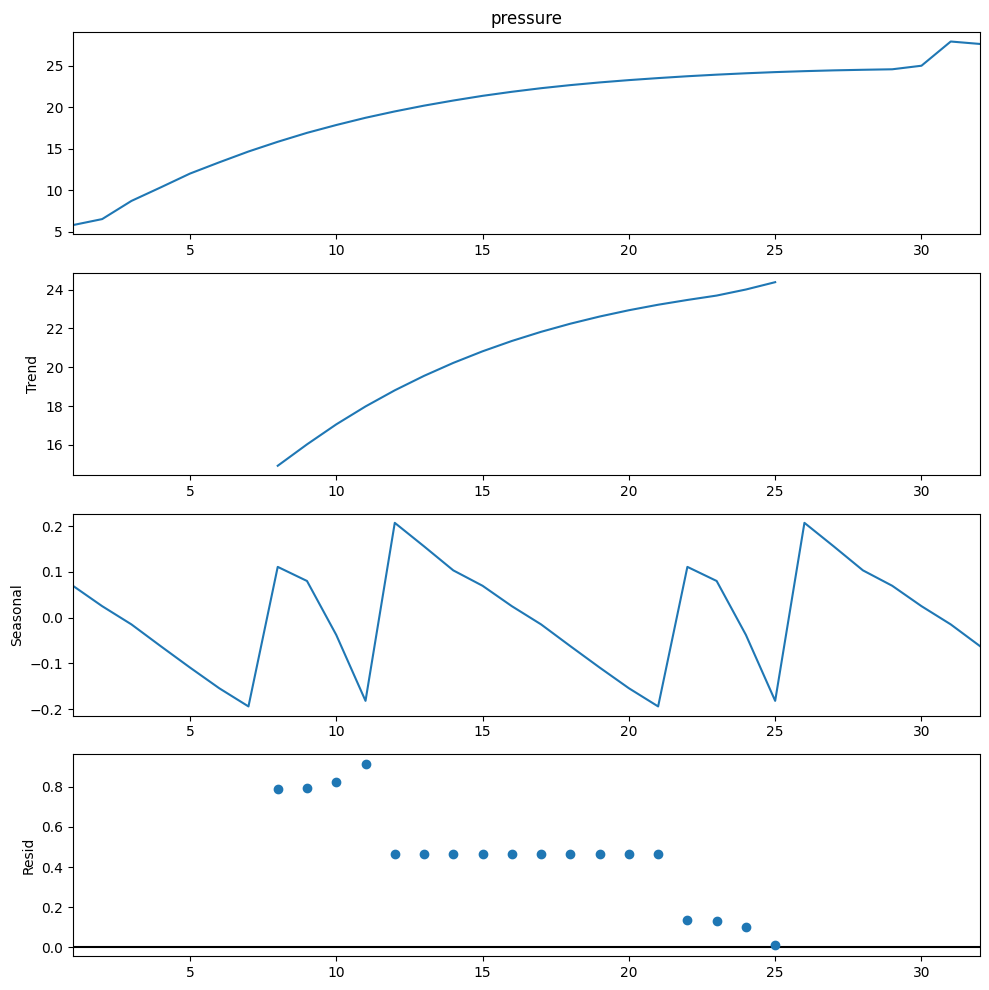

In [452]:
seas_decomp_yearly = seasonal_decompose(
    x=R5_C10['pressure'], 
    model='additive',
    two_sided=True,
    period=14

)
fig=seas_decomp_yearly.plot()

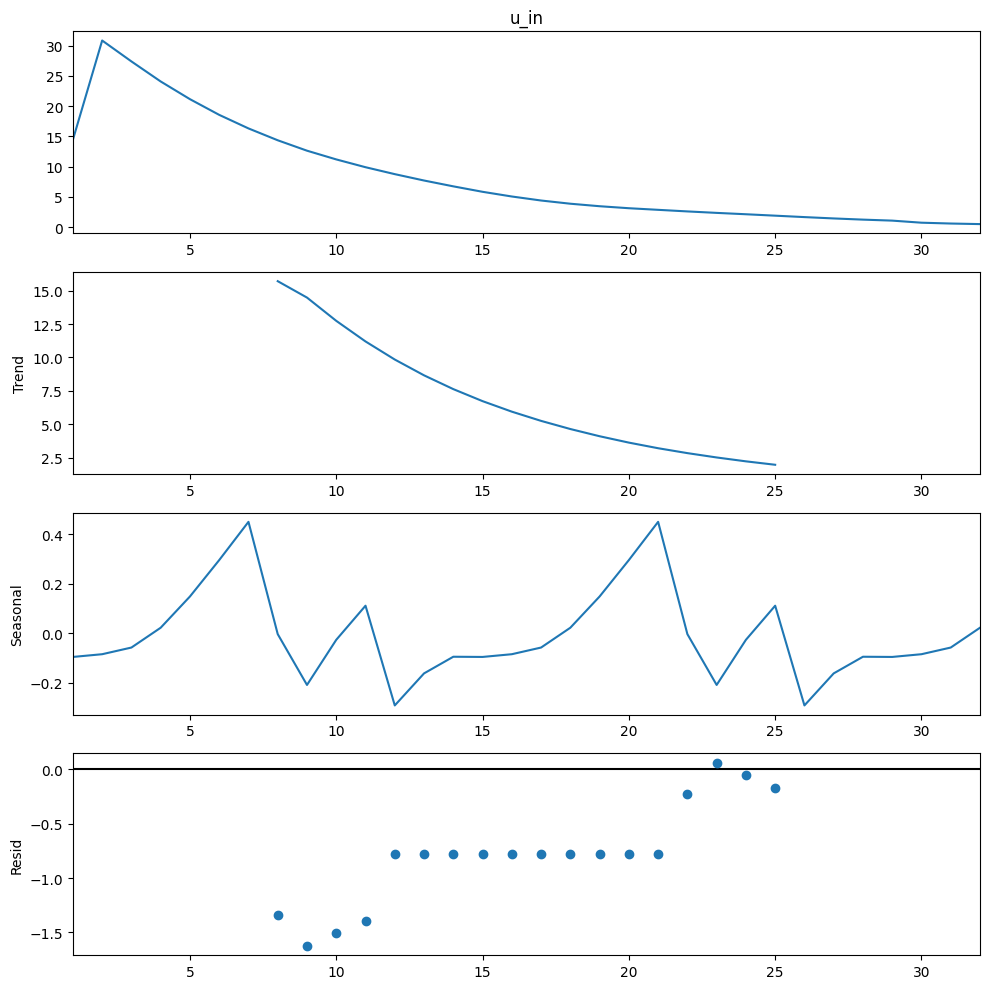

In [453]:
seas_decomp_yearly = seasonal_decompose(
    x=R5_C10['u_in'], 
    model='additive',
    two_sided=True,
    period=14

)
fig=seas_decomp_yearly.plot()

In [454]:
seas_decomp_yearly.seasonal

step_id
1    -0.095813
2    -0.084789
3    -0.057869
4     0.022190
5     0.148302
6     0.295349
7     0.449739
8    -0.003683
9    -0.208920
10   -0.026664
11    0.111079
12   -0.291642
13   -0.162260
14   -0.095018
15   -0.095813
16   -0.084789
17   -0.057869
18    0.022190
19    0.148302
20    0.295349
21    0.449739
22   -0.003683
23   -0.208920
24   -0.026664
25    0.111079
26   -0.291642
27   -0.162260
28   -0.095018
29   -0.095813
30   -0.084789
31   -0.057869
32    0.022190
Name: seasonal, dtype: float64

In [455]:
red_df=red_df.drop(['u_in_cumsum', 'minus_one', 'plus_one', 'exponent','factor'],axis=1)
add this before X and y

SyntaxError: invalid syntax (2482936297.py, line 2)

In [ ]:
def error_analysis(y_test, y_pred_test):
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([y_test.min(), y_test.max()], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

#error_analysis(y_test, y_pred)